# Decision Tree

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font',family = 'NanumGothicCoding')

from sklearn.model_selection  import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz

In [2]:
df_raw = pd.read_csv("./data/Concrete.csv", encoding = '949')
df_raw.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE,CONCRETE_COMPRESSIVE_STRENGTH
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df_raw_y = df_raw['CONCRETE_COMPRESSIVE_STRENGTH']
df_raw_x = df_raw.drop("CONCRETE_COMPRESSIVE_STRENGTH", axis = 1, inplace = False)
df_raw_x.head()

,CEMENT,BLAST_FURNACE_SLAG,FLY_ASH,WATER,SUPERPLASTICIZER,COARSE_AGGREGATE,FINE_AGGREGATE,AGE
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [4]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               , test_size = 0.3, random_state = 1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))


train data X size : (721, 8)
train data Y size : (721,)
test data X size : (309, 8)
test data Y size : (309,)


### 데이터 분할
> - at first Devide (train 0.7 test 0.3)
- and then, dived train data to (train 0.4, validation 0.3)
- only use validation data instead of test to check cost
- finally use test date at once.

In [5]:
df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y
                                                               , test_size = 0.4, random_state = 1234)
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('validation X size : {}'.format(df_validation_x.shape))
print('validation Y size : {}'.format(df_validation_y.shape))


train data X size : (432, 8)
train data Y size : (432,)
validation X size : (289, 8)
validation Y size : (289,)


### 모델 생성

In [6]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print('Score on trainning set : {:.3f}'.format(tree_uncustomized.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(tree_uncustomized.score(df_validation_x, df_validation_y)))

Score on trainning set : 1.000
Score on test set : 0.734


In [7]:
tree_uncustomized

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

> - min_samples_split = 2
- min_samples_leaf = 1
- 최소 맆노드는 1, 최소로 나누는 트리 갯수는 2

### Tree 갯수 변경에 따른 모델 성능

In [8]:
train_score = [];test_score=[]
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234
                                ,min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_validation_x, df_validation_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

In [9]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.734
1,2,0.984,0.722
2,3,0.963,0.713
3,4,0.953,0.720
4,5,0.923,0.704
5,6,0.911,0.689
6,7,0.893,0.680
7,8,0.878,0.682
8,9,0.862,0.657
9,10,0.850,0.668


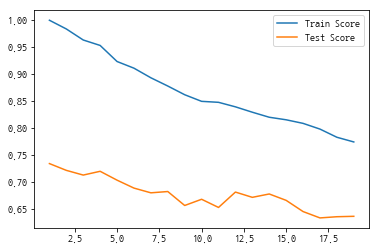

In [10]:
plt.plot(para_leaf, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_leaf, test_score, linestyle = '-', label = 'Test Score')
plt.legend()

> 최소 Leaf Node는 1이 적당함

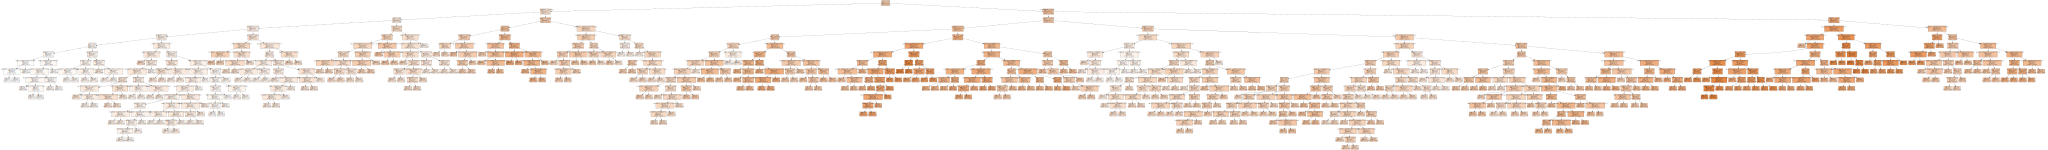

In [11]:
v_feature_names = df_train_x.columns

tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf = 1)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_leaf_A.dot',
               feature_names = v_feature_names, impurity = True, filled = True)
with open('tree_leaf_A.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### Splite - 분리 노드의 최소 자료수

In [12]:
train_score = [];test_score=[]
para_split = [n_split * 2 for n_split in range(1,30)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 1
                                ,min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_validation_x, df_validation_y))
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplite'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split.round(3).head()

,MinSamplesSplite,TrainScore,TestScore
0,2,1.000,0.734
1,4,0.992,0.739
2,6,0.980,0.732
3,8,0.963,0.725
4,10,0.952,0.711


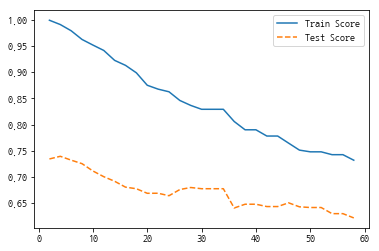

In [13]:
plt.plot(para_split, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_split, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

> Min_Splite 는 4일 때 0.739로 적합하다.

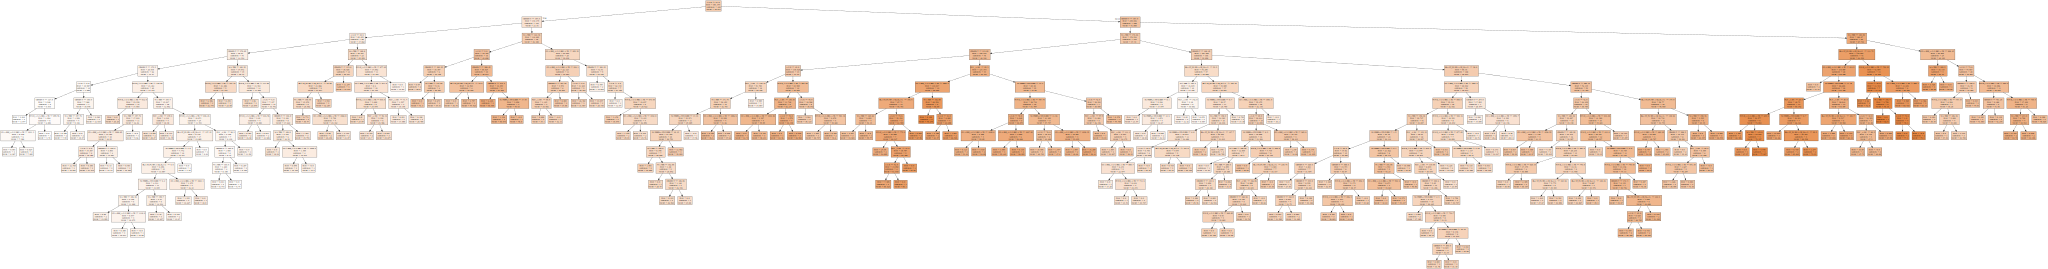

In [14]:
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=1, min_samples_split = 4)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file = 'tree_split_A.dot',
               feature_names = v_feature_names, impurity = True, filled = True)
with open('tree_split_A.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [17]:
train_score = [];test_score=[]
para_depth = [depth for depth in range(1,20)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 1
                                ,min_samples_split = 4, max_depth = v_max_depth)
    
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_validation_x, df_validation_y))
    
df_score_depth = pd.DataFrame()
df_score_depth['MinSamples_Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score
df_score_depth.round(3)

,MinSamples_Depth,TrainScore,TestScore
0,1,0.283,0.196
1,2,0.509,0.419
2,3,0.651,0.505
3,4,0.752,0.602
4,5,0.845,0.651
5,6,0.905,0.674
6,7,0.946,0.712
7,8,0.967,0.716
8,9,0.980,0.725
9,10,0.986,0.741


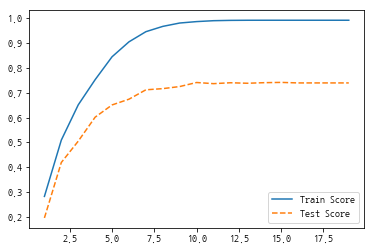

In [18]:
plt.plot(para_depth, train_score, linestyle = '-', label = 'Train Score')
plt.plot(para_depth, test_score, linestyle = '--', label = 'Test Score')
plt.legend()

> Depth는 15일 때 적절함

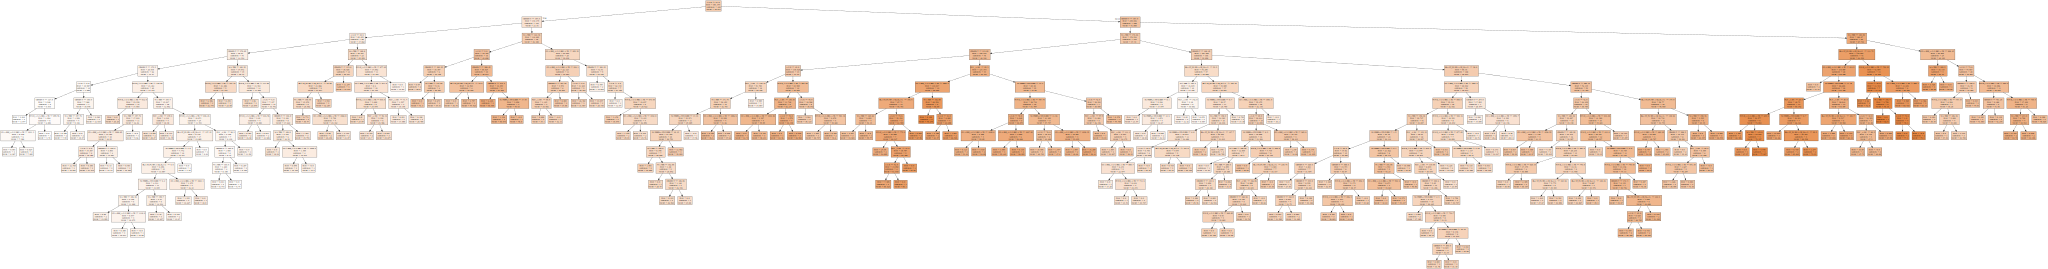

In [19]:
tree_graph = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 1, min_samples_split = 4, max_depth = 15)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file = 'tree_depth_A.dot',
               feature_names = v_feature_names, impurity = True, filled = True)
with open('tree_split_A.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [20]:
tree_final = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 1, min_samples_split = 4, max_depth = 15)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

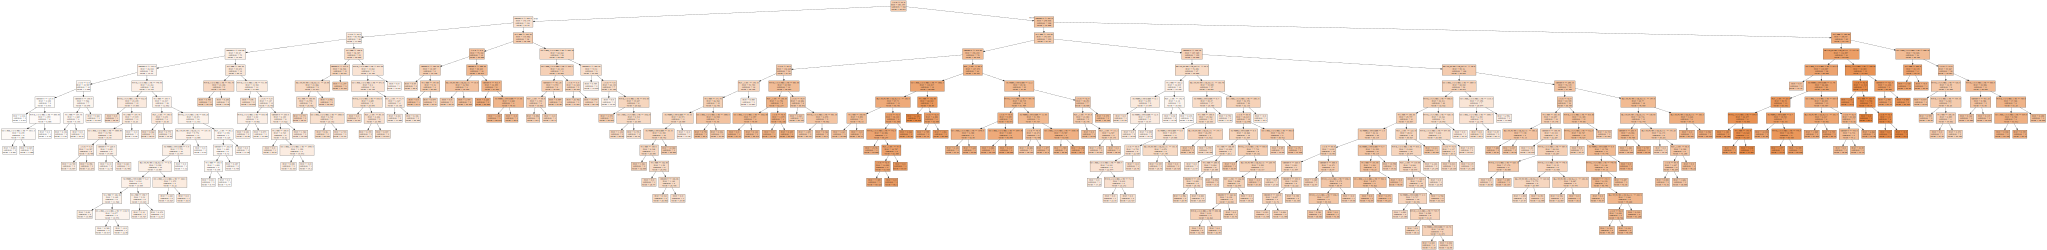

In [21]:
export_graphviz(tree_final, out_file = 'tree_final_A.dot', feature_names = v_feature_names, impurity = True, filled = True)

with open('tree_final_A.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [22]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_names
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)


,Feature,Importance
7,AGE,0.346
0,CEMENT,0.319
3,WATER,0.148
1,BLAST_FURNACE_SLAG,0.065
5,COARSE_AGGREGATE,0.038
6,FINE_AGGREGATE,0.031
4,SUPERPLASTICIZER,0.027
2,FLY_ASH,0.025


Text(0, 0.5, '변수')

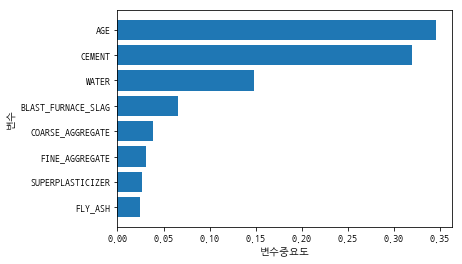

In [23]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수중요도')
plt.ylabel('변수')

In [24]:
# estimator = DecisionTreeRegressor()

# #구하고자 하는 parameter와 범위
# param_grid = {'criterion':['mse','friedman_mse','mae'], 'max_features':['auto','sqrt','log2'],
#              'max_depth':para_depth, 'min_samples_split':para_split,
#              'min_samples_leaf':para_leaf}

# #설명력이 높은 최적 parameter찾기
# grid_dt = GridSearchCV(estimator, param_grid, scoring = 'r2', n_jobs = -1)
# grid_dt.fit(df_train_x, df_train_y)

# print('best estimator model: \n {}'.format(grid_dt.best_estimator_))
# print('\n nbest parameter : \n {}'.format(grid_dt.best_params_))
# print('\n best score: \n {}'.format(grid_dt.best_score_.round(3)))

In [25]:

print('Score on trainning set : {:.3f}'.format(tree_final.score(df_train_x, df_train_y)))
print('Score on test set : {:.3f}'.format(tree_final.score(df_test_x, df_test_y)))

Score on trainning set : 0.992
Score on test set : 0.714
